## Imports

In [292]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing dataset

In [293]:
df = pd.read_csv("WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,0
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5,1
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5,2
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6,3
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,4


In [294]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00
mean,8.31,0.53,0.27,2.53,0.09,15.62,45.91,1.00,3.31,0.66,10.44,5.66,804.97
std,1.75,0.18,0.20,1.36,0.05,10.25,32.78,0.00,0.16,0.17,1.08,0.81,464.00
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00,0.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,21.00,1.00,3.21,0.55,9.50,5.00,411.00
50%,7.90,0.52,0.25,2.20,0.08,13.00,37.00,1.00,3.31,0.62,10.20,6.00,794.00
75%,9.10,0.64,0.42,2.60,0.09,21.00,61.00,1.00,3.40,0.73,11.10,6.00,1209.50
max,15.90,1.58,1.00,15.50,0.61,68.00,289.00,1.00,4.01,2.00,14.90,8.00,1597.00


## Checking data types in dataset

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [296]:
# Description:
# This datasets is related to red variants of the Portuguese "Vinho Verde" wine.
# The dataset describes the amount of various chemicals present in wine and their effect on it's quality. 
# The datasets can be viewed as classification or regression tasks. 
# The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).
# A simple yet challenging project, to anticipate the quality of wine.
# The complexity arises due to the fact that the dataset has fewer samples, & is highly imbalanced.

In [297]:
# This data frame contains the following columns:

# Input variables (based on physicochemical tests):\
# 1 - fixed acidity\
# 2 - volatile acidity\
# 3 - citric acid\
# 4 - residual sugar\
# 5 - chlorides\
# 6 - free sulfur dioxide\
# 7 - total sulfur dioxide\
# 8 - density\
# 9 - pH\
# 10 - sulphates\
# 11 - alcohol\
# Output variable (based on sensory data):\
# 12 - quality (score between 0 and 10)

## Checking nul values

In [298]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [299]:
df.drop(columns="Id",inplace=True)
print("The Value Quality ",df["quality"].unique())

The Value Quality  [5 6 7 4 8 3]


In [300]:
import plotly.express as px
fig = px.imshow(df.corr(),
                labels=dict(x="Columns", y="Columns"),
                x=df.columns,
                y=df.columns,
                color_continuous_scale="Viridis",
                title="Correlation Plot of the Wine Quality Prediction")

fig.show()

In [301]:
for a in range(len(df.corr().columns)):
    for b in range(a):
        print (df.corr().columns[a],":",df.corr().columns[b],":",df.corr().iloc[a,b])

volatile acidity : fixed acidity : -0.2507283222922267
citric acid : fixed acidity : 0.6731572507629235
citric acid : volatile acidity : -0.5441869374183994
residual sugar : fixed acidity : 0.17183053523615718
residual sugar : volatile acidity : -0.005751096727715598
residual sugar : citric acid : 0.17581485365184404
chlorides : fixed acidity : 0.10788856981486475
chlorides : volatile acidity : 0.05633625898948119
chlorides : citric acid : 0.24531248978995243
chlorides : residual sugar : 0.07086311181911287
free sulfur dioxide : fixed acidity : -0.16483079329778236
free sulfur dioxide : volatile acidity : -0.0019624789024567917
free sulfur dioxide : citric acid : -0.05758910401502515
free sulfur dioxide : residual sugar : 0.1653387971252345
free sulfur dioxide : chlorides : 0.015280458103643783
total sulfur dioxide : fixed acidity : -0.11062836769999605
total sulfur dioxide : volatile acidity : 0.07774772174216345
total sulfur dioxide : citric acid : 0.0368711101713151
total sulfur dio

In [302]:
for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) >0.7:
            name = df.corr().columns[a]
            print(name)

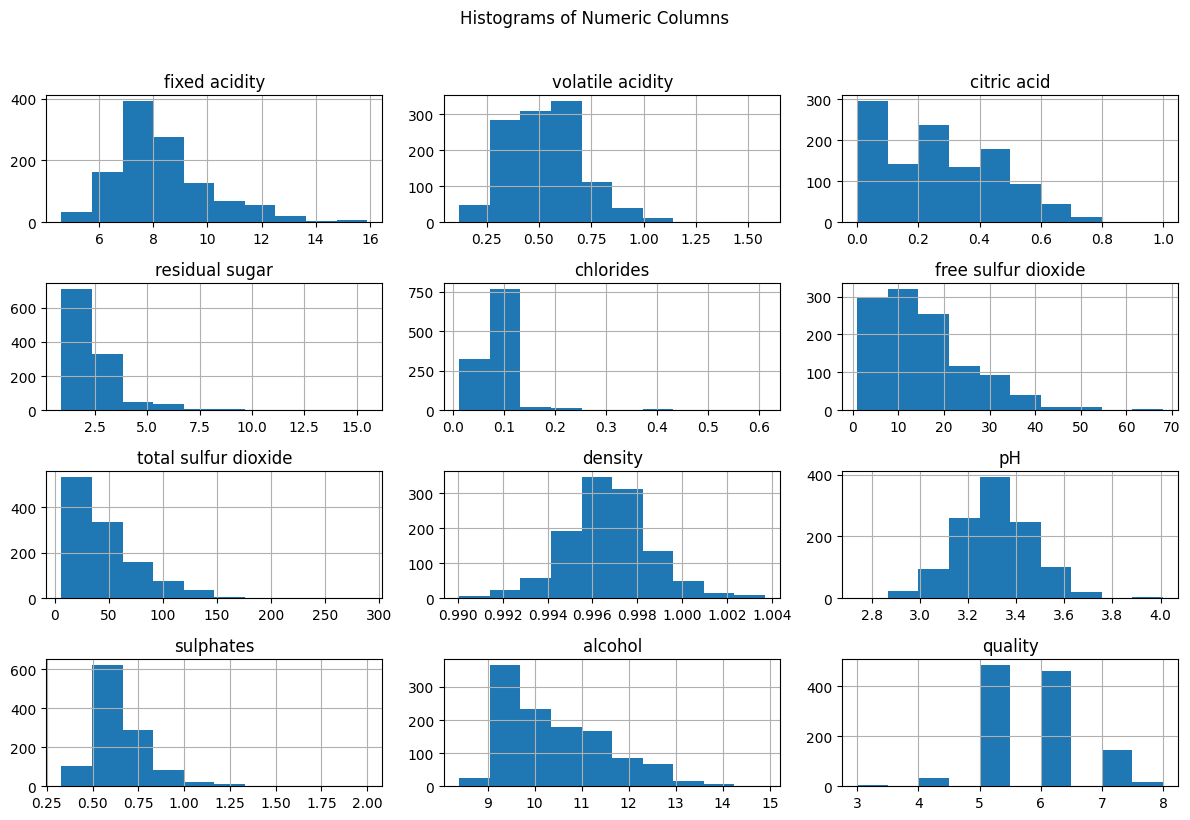

In [303]:
df.hist(figsize=(12, 8))
plt.suptitle("Histograms of Numeric Columns", y=1.02)
plt.tight_layout()
plt.show()

In [304]:
avg_qua = df.groupby("quality").mean()
avg_qua

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.45,0.90,0.21,2.67,0.11,8.17,24.50,1.00,3.36,0.55,9.69
4,7.81,0.70,0.17,2.57,0.09,14.85,40.61,1.00,3.39,0.64,10.26
5,8.16,0.59,0.24,2.54,0.09,16.61,55.30,1.00,3.30,0.61,9.90
6,8.32,0.50,0.26,2.44,0.09,15.22,39.94,1.00,3.32,0.68,10.66
7,8.85,0.39,0.39,2.76,0.08,14.54,37.49,1.00,3.29,0.74,11.48
8,8.81,0.41,0.43,2.64,0.07,11.06,29.38,1.00,3.24,0.77,11.94


In [305]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

## Standardizing Data

In [306]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(x)
# Y = scaler.fit_transform(y.reshape(-1,1))
X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)


## Normalized Data

In [307]:
from sklearn.preprocessing import MinMaxScaler

scaler_ = MinMaxScaler()

X_Train = scaler_.fit_transform(x_train)
X_Test = scaler_.fit_transform(x_test)

## Lazy predict for Normalized datset 

In [308]:
from lazypredict.Supervised import LazyClassifier 
clf = LazyClassifier(verbose=0, 
                     ignore_warnings=False, 
                     custom_metric=None) 
models, predictions = clf.fit(X_Train, X_Test, 
                              y_train, y_test) 
print(models,predictions) 


  0%|          | 0/29 [00:00<?, ?it/s]

  3%|▎         | 1/29 [00:00<00:09,  3.02it/s]

ROC AUC couldn't be calculated for AdaBoostClassifier
multi_class must be in ('ovo', 'ovr')


 14%|█▍        | 4/29 [00:00<00:04,  5.48it/s]

ROC AUC couldn't be calculated for BaggingClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for BernoulliNB
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for CalibratedClassifierCV
multi_class must be in ('ovo', 'ovr')


 28%|██▊       | 8/29 [00:00<00:01, 11.79it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)
ROC AUC couldn't be calculated for DecisionTreeClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for DummyClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for ExtraTreeClassifier
multi_class must be in ('ovo', 'ovr')


 41%|████▏     | 12/29 [00:01<00:02,  7.13it/s]

ROC AUC couldn't be calculated for ExtraTreesClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for GaussianNB
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for KNeighborsClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LabelPropagation
multi_class must be in ('ovo', 'ovr')


 48%|████▊     | 14/29 [00:02<00:01,  7.69it/s]

ROC AUC couldn't be calculated for LabelSpreading
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LinearDiscriminantAnalysis
multi_class must be in ('ovo', 'ovr')


 55%|█████▌    | 16/29 [00:02<00:02,  6.48it/s]

ROC AUC couldn't be calculated for LinearSVC
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LogisticRegression
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for NearestCentroid
multi_class must be in ('ovo', 'ovr')
NuSVC model failed to execute
specified nu is infeasible
ROC AUC couldn't be calculated for PassiveAggressiveClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for Perceptron
multi_class must be in ('ovo', 'ovr')


 72%|███████▏  | 21/29 [00:02<00:00, 11.54it/s]

ROC AUC couldn't be calculated for QuadraticDiscriminantAnalysis
multi_class must be in ('ovo', 'ovr')


 90%|████████▉ | 26/29 [00:03<00:00,  7.95it/s]

ROC AUC couldn't be calculated for RandomForestClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for RidgeClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for RidgeClassifierCV
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for SGDClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for SVC
multi_class must be in ('ovo', 'ovr')
StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'
XGBClassifier model failed to execute
Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5], got [3 4 5 6 7 8]
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 953
[LightGBM] [Info] Number of data point

100%|██████████| 29/29 [00:04<00:00,  6.97it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
ROC AUC couldn't be calculated for LGBMClassifier
multi_class must be in ('ovo', 'ovr')
                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
GaussianNB                         0.46               0.42    None      0.48   
AdaBoostClassifier                 0.52               0.40    None      0.49   
LogisticRegression                 0.50               0.39    None      0.46   
LinearDiscriminantAnalysis         0.44               0.38    None      0.45   
PassiveAggressiveClassifier        0.38               0.35    None      0.38   
LabelPropagation                   0.53               0.32    None      0.52   
LabelSpreading                     0.53               0.32    None      0.52   
BernoulliNB                        0.59               0.31    None      0.57   
KNeighborsClassifier               0.

## Lazy predict for standardised datset 

In [309]:
from lazypredict.Supervised import LazyRegressor 
clf = LazyRegressor(verbose=0, 
                     ignore_warnings=False, 
                     custom_metric=None) 
models, predictions = clf.fit(X_train, X_test, 
                              y_train, y_test) 
print(models,predictions) 

  0%|          | 0/42 [00:00<?, ?it/s]

100%|██████████| 42/42 [00:40<00:00,  1.03it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000359 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 953
[LightGBM] [Info] Number of data points in the train set: 914, number of used features: 11
[LightGBM] [Info] Start training from score 5.645514
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          0.47       0.49  0.57        0.65
RandomForestRegressor                        0.42       0.45  0.59        2.16
HistGradientBoostingRegressor                0.40       0.43  0.60        0.74
NuSVR                                        0.40       0.43  0.61        0.11
LGBMRegressor                                0.39       0.42  0.61        0.13
SVR                                          0.39       0.42  0.61        0.19
GradientBoostingRegressor 

In [310]:
from lazypredict.Supervised import LazyClassifier 
clf = LazyClassifier(verbose=0, 
                     ignore_warnings=False, 
                     custom_metric=None) 
models, predictions = clf.fit(X_train, X_test, 
                              y_train, y_test) 
print(models,predictions) 

  0%|          | 0/29 [00:00<?, ?it/s]

  3%|▎         | 1/29 [00:00<00:08,  3.24it/s]

ROC AUC couldn't be calculated for AdaBoostClassifier
multi_class must be in ('ovo', 'ovr')


  7%|▋         | 2/29 [00:00<00:09,  2.77it/s]

ROC AUC couldn't be calculated for BaggingClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for BernoulliNB
multi_class must be in ('ovo', 'ovr')


 14%|█▍        | 4/29 [00:00<00:05,  4.47it/s]

ROC AUC couldn't be calculated for CalibratedClassifierCV
multi_class must be in ('ovo', 'ovr')
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)
ROC AUC couldn't be calculated for DecisionTreeClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for DummyClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for ExtraTreeClassifier
multi_class must be in ('ovo', 'ovr')


 41%|████▏     | 12/29 [00:01<00:02,  7.43it/s]

ROC AUC couldn't be calculated for ExtraTreesClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for GaussianNB
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for KNeighborsClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LabelPropagation
multi_class must be in ('ovo', 'ovr')


 45%|████▍     | 13/29 [00:02<00:02,  7.67it/s]

ROC AUC couldn't be calculated for LabelSpreading
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LinearDiscriminantAnalysis
multi_class must be in ('ovo', 'ovr')


 55%|█████▌    | 16/29 [00:02<00:01,  7.18it/s]

ROC AUC couldn't be calculated for LinearSVC
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LogisticRegression
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for NearestCentroid
multi_class must be in ('ovo', 'ovr')
NuSVC model failed to execute
specified nu is infeasible
ROC AUC couldn't be calculated for PassiveAggressiveClassifier
multi_class must be in ('ovo', 'ovr')


 69%|██████▉   | 20/29 [00:02<00:00, 11.48it/s]

ROC AUC couldn't be calculated for Perceptron
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for QuadraticDiscriminantAnalysis
multi_class must be in ('ovo', 'ovr')


 86%|████████▌ | 25/29 [00:04<00:00,  5.96it/s]

ROC AUC couldn't be calculated for RandomForestClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for RidgeClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for RidgeClassifierCV
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for SGDClassifier
multi_class must be in ('ovo', 'ovr')


 93%|█████████▎| 27/29 [00:04<00:00,  6.62it/s]

ROC AUC couldn't be calculated for SVC
multi_class must be in ('ovo', 'ovr')
StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'
XGBClassifier model failed to execute
Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5], got [3 4 5 6 7 8]
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000407 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 953
[LightGBM] [Info] Number of data points in the train set: 914, number of used features: 11
[LightGBM] [Info] Start training from score -5.208393
[LightGBM] [Info] Start training from score -3.559734
[LightGBM] [Info] Start training from score -0.841480
[LightGBM] [Info] Start training from score -0.912469
[LightGBM] [Info] Start training from score -2.145002
[LightGBM] [Info] Start training from score -4.109780
[LightGBM] [Warning] No further splits with positi

100%|██████████| 29/29 [00:04<00:00,  5.97it/s]

ROC AUC couldn't be calculated for LGBMClassifier
multi_class must be in ('ovo', 'ovr')
                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
QuadraticDiscriminantAnalysis      0.53               0.42    None      0.52   
GaussianNB                         0.53               0.42    None      0.53   
NearestCentroid                    0.34               0.40    None      0.38   
LGBMClassifier                     0.67               0.34    None      0.66   
RandomForestClassifier             0.66               0.33    None      0.65   
LabelPropagation                   0.64               0.33    None      0.63   
LabelSpreading                     0.64               0.33    None      0.63   
ExtraTreesClassifier               0.66               0.33    None      0.64   
BaggingClassifier                  0.62               0.30    None      0.60   
BernoulliNB                     

## K-nearest neighbours

In [311]:
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
max_accuracy = 0
at_neighbours = -1
for i in range (2,20):
    K_model = KNeighborsClassifier(n_neighbors = i)
    K_model.fit(X_train, y_train)

    y_pred_k = K_model.predict(X_test)
    print("Neigbours = ",i)
    print("Score the X-train with Y-train is : ", K_model.score(X_train,y_train))
    print("Score the X-test  with Y-test  is : ", K_model.score(X_test,y_test))
    print(" Model Evaluation K Neighbors Classifier : accuracy score " , accuracy_score(y_test,y_pred_k))
    if accuracy_score(y_test,y_pred_k) > max_accuracy:
        max_accuracy = accuracy_score(y_test,y_pred_k)
        at_neighbours= i
print("Maximum accuracy  = " ,max_accuracy, "at_neighbours = " , at_neighbours )
knn_ = max_accuracy
K_model= KNeighborsClassifier(n_neighbors=at_neighbours)

Neigbours =  2
Score the X-train with Y-train is :  0.7954048140043763
Score the X-test  with Y-test  is :  0.5720524017467249
 Model Evaluation K Neighbors Classifier : accuracy score  0.5720524017467249
Neigbours =  3
Score the X-train with Y-train is :  0.7691466083150985
Score the X-test  with Y-test  is :  0.5633187772925764
 Model Evaluation K Neighbors Classifier : accuracy score  0.5633187772925764
Neigbours =  4
Score the X-train with Y-train is :  0.7188183807439825
Score the X-test  with Y-test  is :  0.5807860262008734
 Model Evaluation K Neighbors Classifier : accuracy score  0.5807860262008734
Neigbours =  5
Score the X-train with Y-train is :  0.6980306345733042
Score the X-test  with Y-test  is :  0.5764192139737991
 Model Evaluation K Neighbors Classifier : accuracy score  0.5764192139737991
Neigbours =  6
Score the X-train with Y-train is :  0.6849015317286652
Score the X-test  with Y-test  is :  0.5414847161572053
 Model Evaluation K Neighbors Classifier : accuracy s

## normalised

In [312]:
max_accuracy_normal = 0
at_neighbours_normal = -1
for i in range (2,20):
    K_model_normal = KNeighborsClassifier(n_neighbors = i)
    K_model_normal.fit(X_Train, y_train)

    y_pred_k = K_model_normal.predict(X_Test)
    print("Neigbours = ",i)
    print("Score the X-train with Y-train is : ", K_model_normal.score(X_Train,y_train))
    print("Score the X-test  with Y-test  is : ", K_model_normal.score(X_Test,y_test))
    print(" Model Evaluation K Neighbors Classifier : accuracy score " , accuracy_score(y_test,y_pred_k))
    if accuracy_score(y_test,y_pred_k) > max_accuracy_normal:
        max_accuracy_normal = accuracy_score(y_test,y_pred_k)
        at_neighbours_normal= i
print("Maximum accuracy  = " ,max_accuracy_normal, "at_neighbours_normal = " , at_neighbours_normal )
K_model_normal= KNeighborsClassifier(n_neighbors=at_neighbours_normal)

Neigbours =  2
Score the X-train with Y-train is :  0.8052516411378556
Score the X-test  with Y-test  is :  0.4759825327510917
 Model Evaluation K Neighbors Classifier : accuracy score  0.4759825327510917
Neigbours =  3
Score the X-train with Y-train is :  0.7669584245076586
Score the X-test  with Y-test  is :  0.4759825327510917
 Model Evaluation K Neighbors Classifier : accuracy score  0.4759825327510917
Neigbours =  4
Score the X-train with Y-train is :  0.7275711159737418
Score the X-test  with Y-test  is :  0.5065502183406113
 Model Evaluation K Neighbors Classifier : accuracy score  0.5065502183406113
Neigbours =  5
Score the X-train with Y-train is :  0.6892778993435449
Score the X-test  with Y-test  is :  0.519650655021834
 Model Evaluation K Neighbors Classifier : accuracy score  0.519650655021834
Neigbours =  6
Score the X-train with Y-train is :  0.6728665207877462
Score the X-test  with Y-test  is :  0.49344978165938863
 Model Evaluation K Neighbors Classifier : accuracy sc

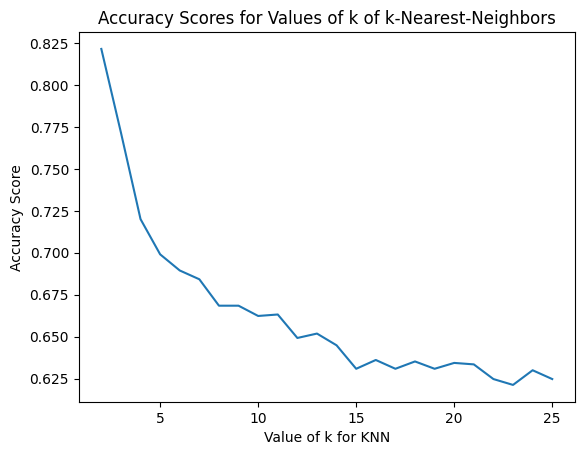

In [313]:
from sklearn import metrics
k_range = list(range(2,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

## Logistic Regressor

In [314]:
from sklearn.linear_model import LogisticRegression
lregressor=LogisticRegression(solver='liblinear')

lregressor.fit(X_train,y_train)

print("Score the X-train with Y-train is : ", lregressor.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", lregressor.score(X_test,y_test))


y_pred_Lo=lregressor.predict(X_test)


print( " Model Evaluation Logistic R : mean absolute error is ", mean_absolute_error(y_test,y_pred_Lo))
print(" Model Evaluation Logistic R : mean squared  error is " , mean_squared_error(y_test,y_pred_Lo))
# print(" Model Evaluation Logistic R : median absolute error is " ,median_absolute_error(y_test,y_pred_Lo)) 

print(" Model Evaluation Logistic R : accuracy score " , accuracy_score(y_test,y_pred_Lo))
lr_ = accuracy_score(y_test,y_pred_Lo)

Score the X-train with Y-train is :  0.6094091903719913
Score the X-test  with Y-test  is :  0.5589519650655022
 Model Evaluation Logistic R : mean absolute error is  0.48034934497816595
 Model Evaluation Logistic R : mean squared  error is  0.5589519650655022
 Model Evaluation Logistic R : accuracy score  0.5589519650655022


## Normalised

In [315]:
lregressor_normal=LogisticRegression(solver='liblinear')

lregressor_normal.fit(X_Train,y_train)

print("Score the X-train with Y-train is : ", lregressor_normal.score(X_Train,y_train))
print("Score the X-test  with Y-test  is : ", lregressor_normal.score(X_Test,y_test))


y_pred_Lo=lregressor_normal.predict(X_Test)


print( " Model Evaluation Logistic R : mean absolute error is ", mean_absolute_error(y_test,y_pred_Lo))
print(" Model Evaluation Logistic R : mean squared  error is " , mean_squared_error(y_test,y_pred_Lo))
print(" Model Evaluation Logistic R : median absolute error is " ,median_absolute_error(y_test,y_pred_Lo)) 

print(" Model Evaluation Logistic R : accuracy score " , accuracy_score(y_test,y_pred_Lo))

Score the X-train with Y-train is :  0.5919037199124726
Score the X-test  with Y-test  is :  0.5065502183406113
 Model Evaluation Logistic R : mean absolute error is  0.5458515283842795
 Model Evaluation Logistic R : mean squared  error is  0.6506550218340611
 Model Evaluation Logistic R : median absolute error is  0.0
 Model Evaluation Logistic R : accuracy score  0.5065502183406113


## Decision tree Classifier

In [316]:
from sklearn.tree import DecisionTreeClassifier

max_acc = 0 
at_depth = -1

for i in range(2, 100):
    dt_classifier = DecisionTreeClassifier(max_depth=i)
    dt_classifier.fit(X_train, y_train)
    print("max_depth:", i)
    print("Score on X-train with Y-train:", dt_classifier.score(X_train, y_train))
    y_pred = dt_classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print("Score on X-test with Y-test:", test_accuracy)
    if test_accuracy > max_acc:
        max_acc = test_accuracy
        at_depth = i
dtc_ = max_acc    

max_depth: 2
Score on X-train with Y-train: 0.5700218818380745
Score on X-test with Y-test: 0.519650655021834
max_depth: 3
Score on X-train with Y-train: 0.6028446389496718
Score on X-test with Y-test: 0.5502183406113537
max_depth: 4
Score on X-train with Y-train: 0.6444201312910285
Score on X-test with Y-test: 0.5720524017467249
max_depth: 5
Score on X-train with Y-train: 0.6827133479212254
Score on X-test with Y-test: 0.5545851528384279
max_depth: 6
Score on X-train with Y-train: 0.7166301969365426
Score on X-test with Y-test: 0.5545851528384279
max_depth: 7
Score on X-train with Y-train: 0.7603938730853391
Score on X-test with Y-test: 0.5545851528384279
max_depth: 8
Score on X-train with Y-train: 0.7964989059080962
Score on X-test with Y-test: 0.5589519650655022


max_depth: 9
Score on X-train with Y-train: 0.850109409190372
Score on X-test with Y-test: 0.5502183406113537
max_depth: 10
Score on X-train with Y-train: 0.8960612691466083
Score on X-test with Y-test: 0.5502183406113537
max_depth: 11
Score on X-train with Y-train: 0.937636761487965
Score on X-test with Y-test: 0.5633187772925764
max_depth: 12
Score on X-train with Y-train: 0.962800875273523
Score on X-test with Y-test: 0.5807860262008734
max_depth: 13
Score on X-train with Y-train: 0.9792122538293216
Score on X-test with Y-test: 0.5414847161572053
max_depth: 14
Score on X-train with Y-train: 0.9912472647702407
Score on X-test with Y-test: 0.537117903930131
max_depth: 15
Score on X-train with Y-train: 0.9978118161925602
Score on X-test with Y-test: 0.5676855895196506
max_depth: 16
Score on X-train with Y-train: 1.0
Score on X-test with Y-test: 0.5633187772925764
max_depth: 17
Score on X-train with Y-train: 1.0
Score on X-test with Y-test: 0.5764192139737991
max_depth: 18
Score on X-tr

In [317]:
print (max_acc)
print (at_depth)
dt_classifier = DecisionTreeClassifier(max_depth=at_depth)

0.5807860262008734
12


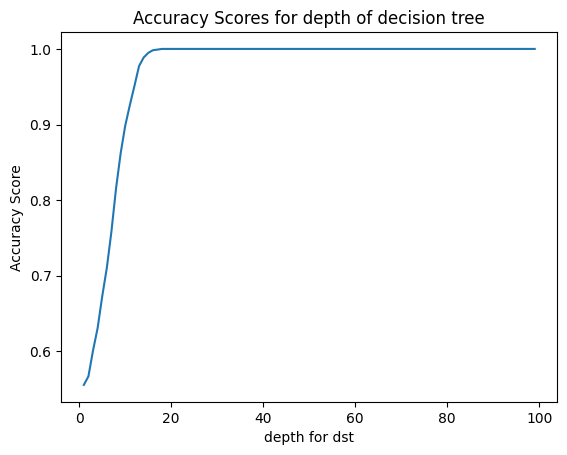

In [318]:

t_range = list(range(1,100))
scores = []
for k in t_range:
    dt = DecisionTreeClassifier(max_depth=k)
    dt.fit(X, y)
    y_pred = dt.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(t_range, scores)
plt.xlabel('depth for dst')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for depth of decision tree')
plt.show()

## SVC

In [319]:
from sklearn.svm import SVC
kernal_list = ['linear', 'poly', 'rbf', 'sigmoid']
at_kernal = "abc"
maxac = -1
for i in kernal_list:
    svc_model=SVC(C=50,kernel=i)
    svc_model.fit(X_train,y_train)
    y_pred_svc =svc_model.predict(X_test)
    print("Score the X-train with Y-train is : ", svc_model.score(X_train,y_train))
    print("Score the X-test  with Y-test  is : ", svc_model.score(X_test,y_test))
    print(" Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_svc))
    if accuracy_score(y_test,y_pred_svc) > maxac:
        maxac = accuracy_score(y_test,y_pred_svc)
        at_kernal = i
print ("max_accuracy = " , maxac ," kernal = " , at_kernal)
svc_model = SVC(C=50,)
svm_ = maxac

Score the X-train with Y-train is :  0.6017505470459519
Score the X-test  with Y-test  is :  0.5414847161572053
 Model Evaluation Decision Tree : accuracy score  0.5414847161572053
Score the X-train with Y-train is :  0.824945295404814
Score the X-test  with Y-test  is :  0.5633187772925764
 Model Evaluation Decision Tree : accuracy score  0.5633187772925764
Score the X-train with Y-train is :  0.9102844638949672
Score the X-test  with Y-test  is :  0.6593886462882096
 Model Evaluation Decision Tree : accuracy score  0.6593886462882096
Score the X-train with Y-train is :  0.48358862144420134
Score the X-test  with Y-test  is :  0.4585152838427948
 Model Evaluation Decision Tree : accuracy score  0.4585152838427948
max_accuracy =  0.6593886462882096  kernal =  rbf


## Random Forest Classifier

In [320]:
from sklearn.ensemble import RandomForestClassifier
rnd = RandomForestClassifier()
rnd.fit(X_train, y_train)

print("Score on X-train with Y-train:", rnd.score(X_train, y_train))
y_pred_rnd = rnd.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_rnd)
print("Score on X-test with Y-test:", test_accuracy)
rfc_= test_accuracy

Score on X-train with Y-train: 1.0
Score on X-test with Y-test: 0.6724890829694323


## Model building results 

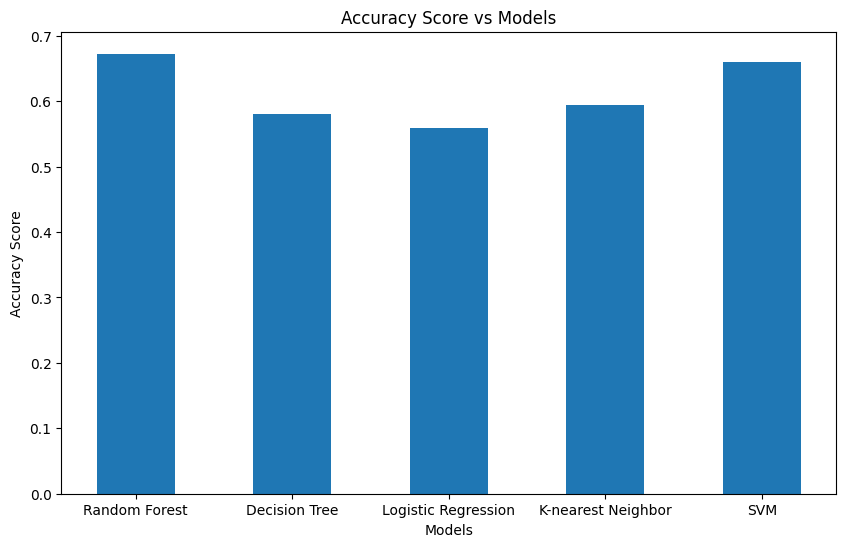

In [327]:
models = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'K-nearest Neighbor', 'SVM']
accuracy_scores = [rfc_, dtc_, lr_, knn_, svm_]

# Set the width and height of the plot image
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the width and height as needed

# Create an array of indices for x-axis positions
x = np.arange(len(models))

# Increase the width of the bars
bar_width = 0.5  # Adjust the width as needed

# Create a bar plot with string labels on the x-axis
plt.bar(x, accuracy_scores, tick_label=models, width=bar_width)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs Models')

# Show the plot
plt.show()
 


In [328]:
accuracy_scores

[0.6724890829694323,
 0.5807860262008734,
 0.5589519650655022,
 0.5938864628820961,
 0.6593886462882096]

## Linear Model

In [ ]:
# Score the X-train with Y-train is :  0.6094091903719913
# Score the X-test  with Y-test  is :  0.5589519650655022
#  Model Evaluation Logistic R : mean absolute error is  0.48034934497816595
#  Model Evaluation Logistic R : mean squared  error is  0.5589519650655022
#  Model Evaluation Logistic R : accuracy score  0.5589519650655022

## K-nearest neighbour

In [ ]:
# Maximum accuracy  =  0.5938864628820961 at_neighbours =  17